# Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter('ignore')

# Download Dataset

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/diabetes-prediction-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# DATA PREPROCESSING

#### Data Processing merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.



In [9]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Pengecekan data yang terdindikasi duplikat

In [10]:
df.duplicated().sum()


np.int64(3854)

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df['smoking_history'].value_counts() # 35816 no info so we should drop columns to avoid inaccureate data


,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


#### Melakukan Drop Column pada kolom smoking_history

In [12]:
df.drop(columns=['smoking_history'],inplace=True) #preprocessing


In [13]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,24.60,4.8,145,0
99996,Female,2.0,0,0,17.37,6.5,100,0
99997,Male,66.0,0,0,27.83,5.7,155,0
99998,Female,24.0,0,0,35.42,4.0,100,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   bmi                  96146 non-null  float64
 5   HbA1c_level          96146 non-null  float64
 6   blood_glucose_level  96146 non-null  int64  
 7   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.6+ MB


# EDA

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

In [15]:
cat_features = ['gender']
num_features = ['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']

        jumlah sampel  persentase
gender                           
Female          56161        58.4
Male            39967        41.6
Other              18         0.0


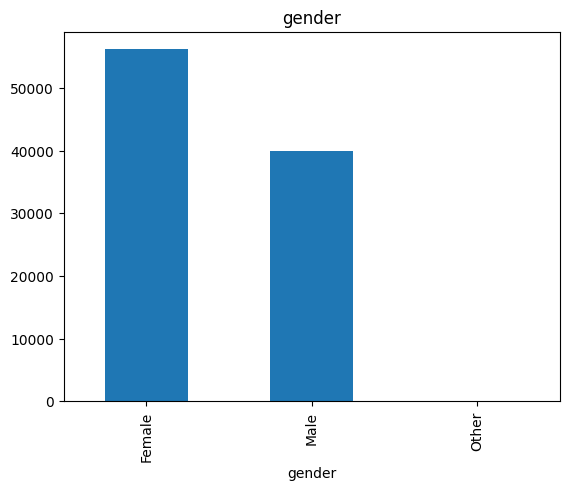

In [16]:
feature = cat_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

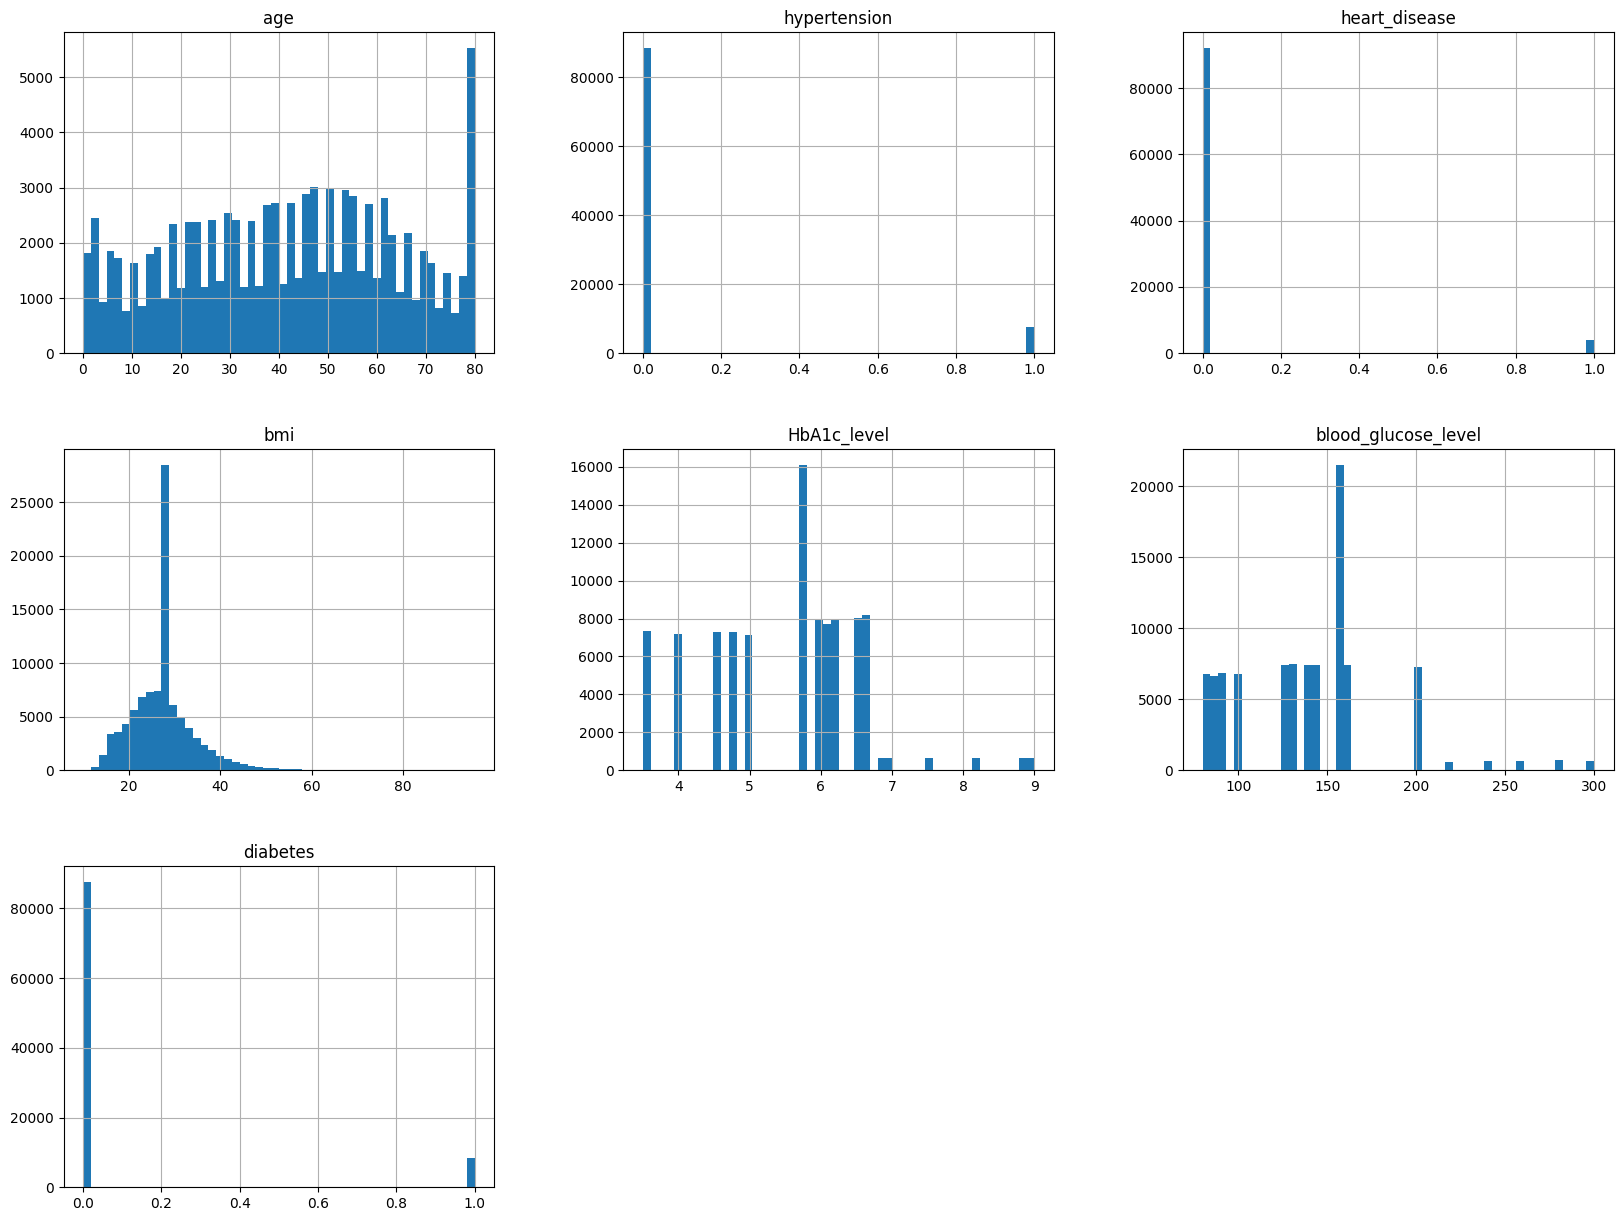

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# MULTIVARIATE ANALYSIS

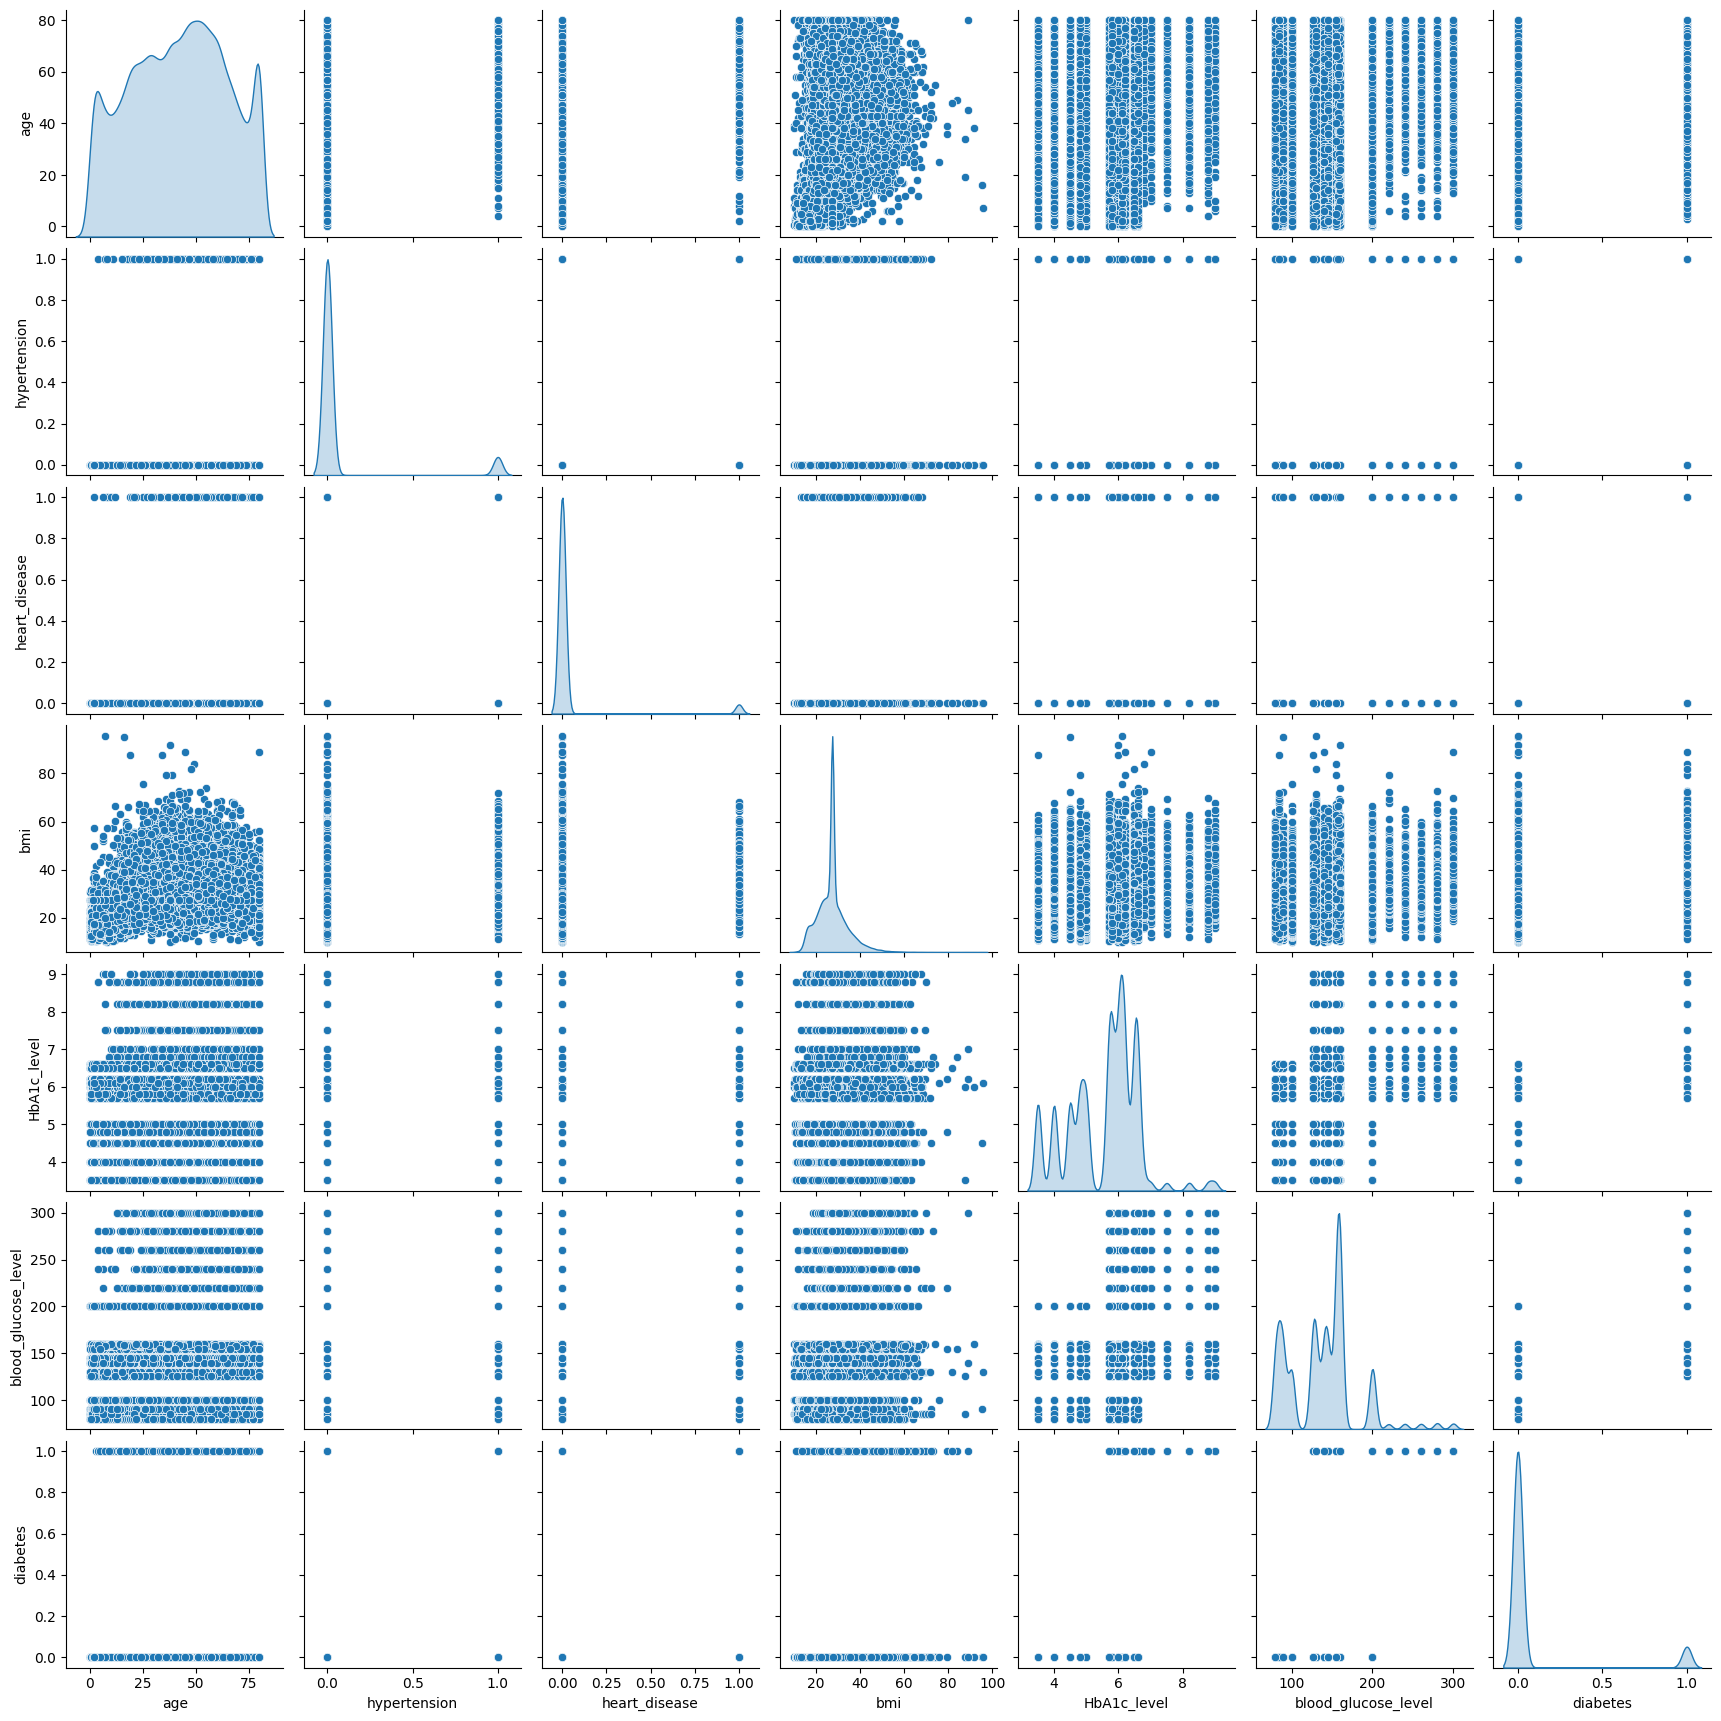

In [18]:
sns.pairplot(df, diag_kind = 'kde')


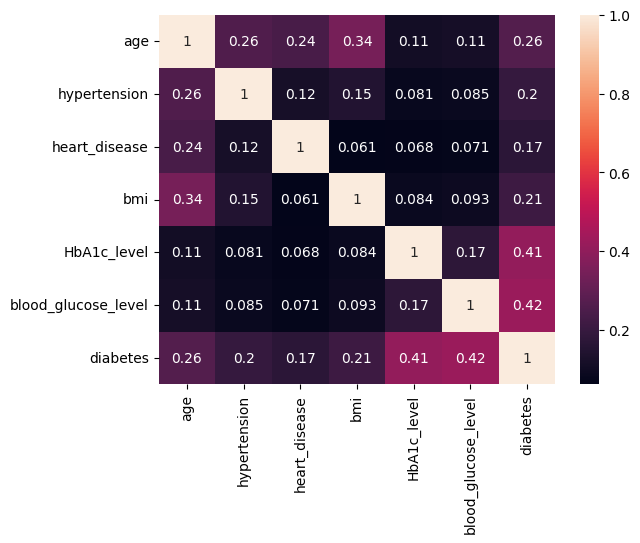

In [19]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# BIVARIATE ANALYSIS

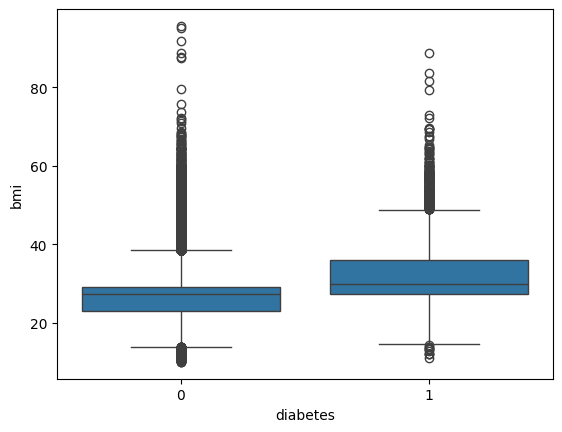

In [20]:
sns.boxplot(x ='diabetes', y='bmi', data=df)
plt.show()

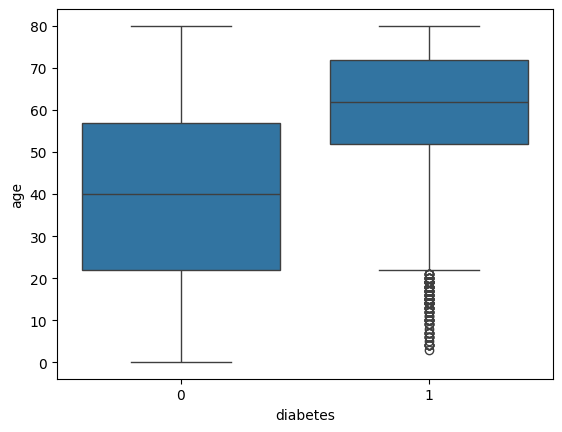

In [21]:
sns.boxplot(x='diabetes', y='age', data=df)
plt.show()

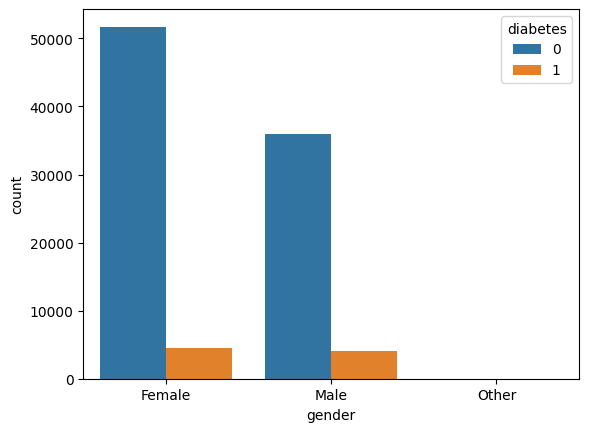

In [22]:
sns.countplot(x = 'gender', hue  = 'diabetes', data=df)
plt.show()

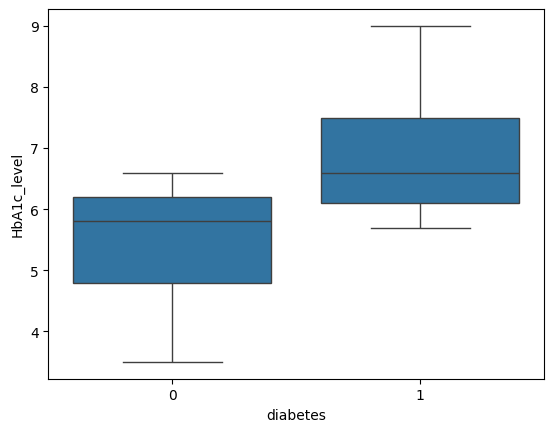

In [23]:
sns.boxplot(x ='diabetes', y= 'HbA1c_level', data=df)
plt.show()

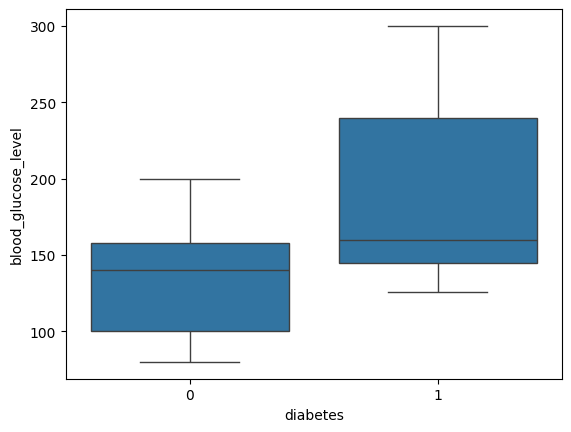

In [24]:
sns.boxplot(x = 'diabetes', y= 'blood_glucose_level', data =df)
plt.show()

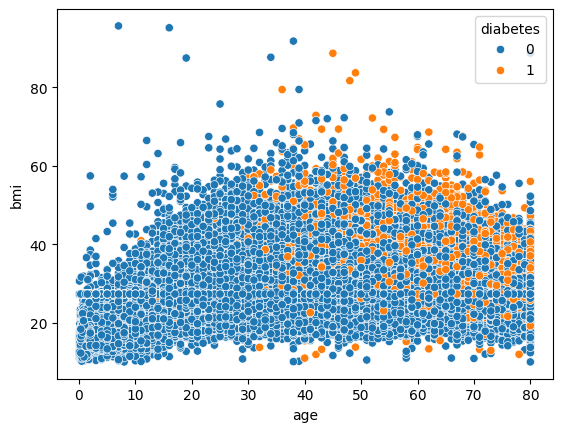

In [25]:
sns.scatterplot(x='age', y='bmi', hue ='diabetes', data=df)
plt.show()

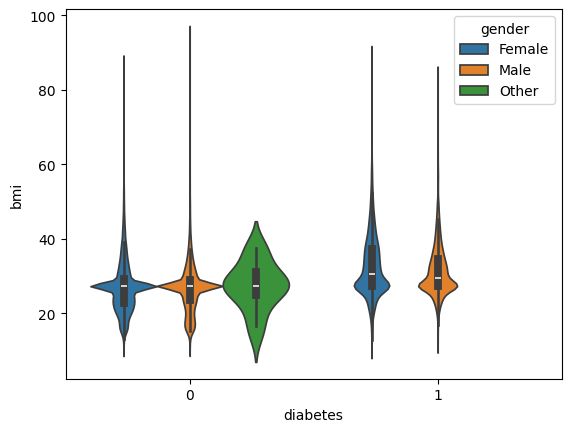

In [26]:
sns.violinplot(x= 'diabetes', y='bmi', hue="gender",  data=df)
plt.show()

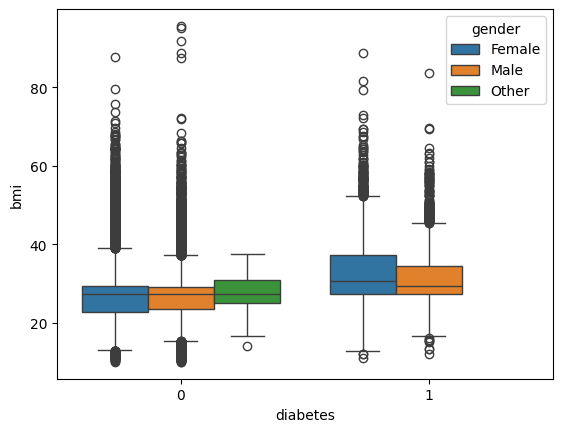

In [27]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.show()

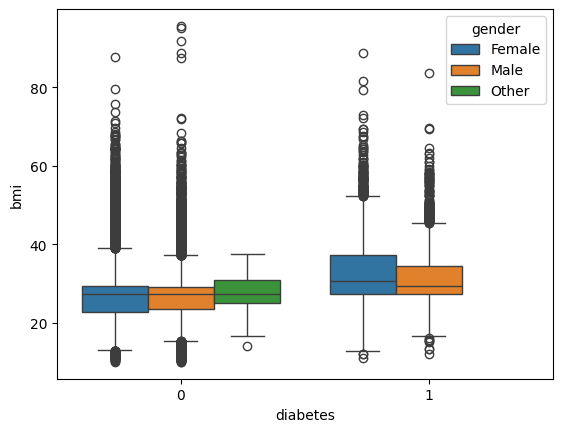

In [28]:
sns.boxplot(x= 'diabetes', y='bmi', hue='gender', data=df)
plt.show()

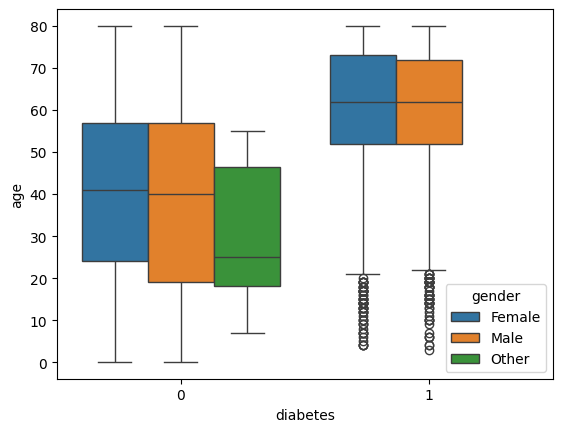

In [29]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.show()

#### dilakukan proses pengubahan data kategorikal pada kolom gender menjadi nilai numerik

In [30]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])

#### Proses untuk mendeteksi dan menghapus outlier (data pencilan) dari fitur numerik.

In [31]:
numeric_columns = df.select_dtypes(include=['number']).columns  # Semua angka
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


## Split dataset

#### Pembagian dataset menjadi 80% digunakan untuk training model dan 20% untuk mengevaluasi model.

In [32]:
from sklearn.model_selection import train_test_split
# Menentukan fitur (X) dan label (y)
X = df.drop(["diabetes"],axis =1)
y = df["diabetes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (76916, 7)
Testing set size: (19230, 7)


## Normalisasi

#### MinMaxScaler adalah teknik normalisasi yang mengubah nilai fitur atau variabel ke dalam rentang [0,1] yang berarti bahwa nilai minimum dan maksimum dari fitur/variabel masing-masing adalah 0 dan 1

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Make Models

Membuat beberapa model yang untuk mencari model mana yang lebih akurat diantara yang lainnya.

In [34]:
# Menyiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['KNN', 'RandomForest', 'SVM', 'Decision Tree','Naive Bayes'])

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Buat model prediksi dengan KNN
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# Lakukan prediksi dengan model KNN
knn_pred = model_knn.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Train a model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt


# Lakukan prediksi dengan model Random Forest
rf_pred = rf_model.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)


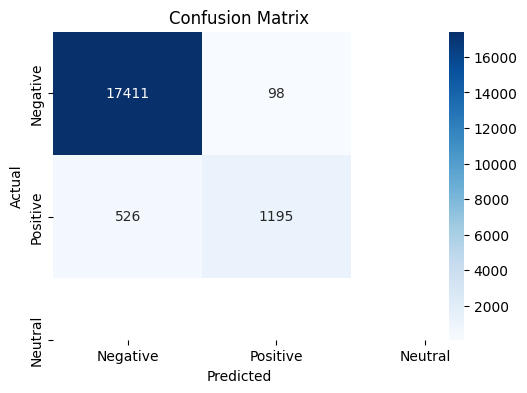

In [39]:
import seaborn as sns

# Create and visualize confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

In [40]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear', random_state=42, C=7.5)
svm_model.fit(X_train, y_train)

SVC(C=7.5, kernel='linear', random_state=42)

In [41]:
# Lakukan prediksi dengan model SVM Classifier
svm_pred = svm_model.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','SVM'] = accuracy_score(y_test, svm_pred)


# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
# Lakukan prediksi dengan model Decision Tree Model
dt_pred = dt_model.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','Decision Tree'] = accuracy_score(y_test, dt_pred)


# Naive Bayes

In [44]:
from sklearn.naive_bayes import BernoulliNB

# Buat model prediksi dengan Bernoulli Naive Bayes
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB()

In [45]:
# Lakukan prediksi dengan model Naive Bayes
nb_pred = model_nb.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','Naive Bayes'] = accuracy_score(y_test, nb_pred)

# Evaluasi model

Proses Evaluasi Model merupakan tahap untuk membuktikan suatu model cocok dengan tujuan yang telah ditentukan dan untuk memastikan model mampu membuat prediksi yang akurat.

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_knn = model_knn.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_nb = model_nb.predict(X_test)

accuracy_scores = {}

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print("-" * 20)

evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


Metrics for KNN:
  Accuracy: 0.9612
  Precision: 0.8624
  Recall: 0.6734
  F1-score: 0.7563
--------------------
Metrics for SVM:
  Accuracy: 0.9576
  Precision: 0.9126
  Recall: 0.5822
  F1-score: 0.7109
--------------------
Metrics for Random Forest:
  Accuracy: 0.9676
  Precision: 0.9242
  Recall: 0.6944
  F1-score: 0.7930
--------------------
Metrics for Decision Tree:
  Accuracy: 0.9502
  Precision: 0.7152
  Recall: 0.7368
  F1-score: 0.7258
--------------------
Metrics for Naive Bayes:
  Accuracy: 0.9093
  Precision: 0.4392
  Recall: 0.0482
  F1-score: 0.0869
--------------------


Kesimpulan Evaluasi Dari setiap model

- Model Random Forest memberikan hasil terbaik dengan kombinasi accuracy, precision, recall, dan F1-score yang paling seimbang dan tinggi.

- KNN memiliki accuracy yang tinggi, namun recall relatif rendah, yang berarti masih banyak kasus positif yang gagal terdeteksi.

- SVM menghasilkan precision tinggi, namun recall cukup rendah, artinya model sangat berhati-hati (minim false positive), tapi kurang menangkap banyak kasus positif.

- Naive Bayes memiliki performa yang jauh lebih rendah dibandingkan model lainnya.

## Membuat grafik perbandingan dari kelima model yang telah dibuat

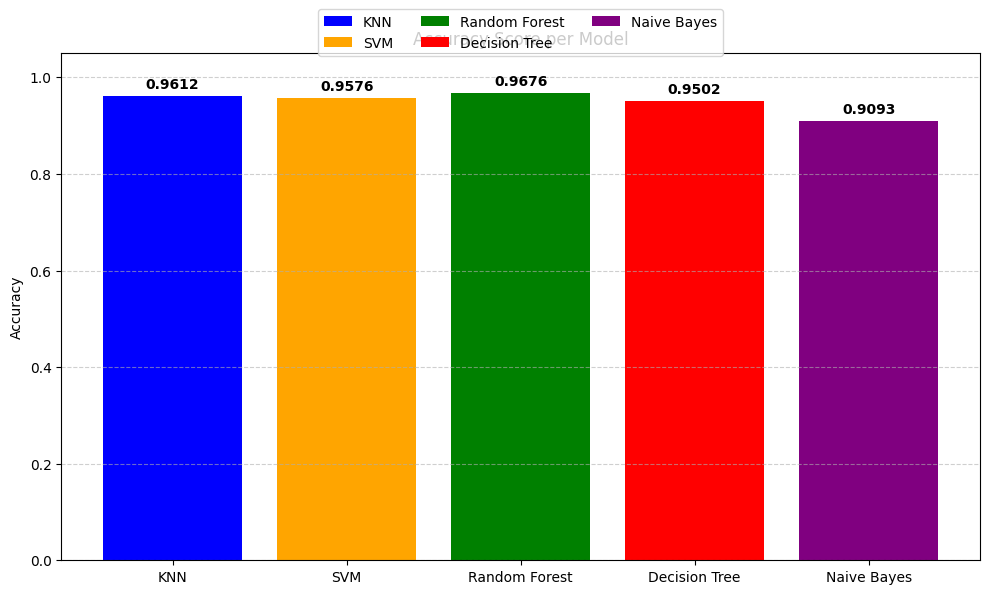

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Skor akurasi dan nama model
model_names = ['KNN', 'SVM', 'Random Forest', 'Decision Tree', 'Naive Bayes']
accuracy_scores = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nb)
]

# Warna berbeda untuk setiap model
colors = ['Blue', 'Orange', 'Green', 'Red', 'Purple']  # Blue, Orange, Green, Red, Purple
x = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
bars = plt.bar(x, accuracy_scores, color=colors)

# Menambahkan nilai akurasi di atas bar
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Konfigurasi tampilan
plt.xticks(x, model_names)
plt.ylim(0, 1.05)
plt.ylabel('Accuracy')
plt.title('Accuracy Score per Model')
plt.legend(bars, model_names, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


##### Dari diagram diatas dapat kita lihat bahwa model Random Forest adalah Model tertinggi daripada keempat model lainnya. Dengan itu, maka model ini yang akan dipakai. Model ini memberikan dampak nyata dalam meningkatkan efisiensi dan ketepatan dalam proses penilaian risiko diabetes pada masyarakat luas.

## Penutup

#### Saat ini model untuk memprediksi diabetes telah didapatkan. Dengan model ini diimplementasi lebih lanjut untuk dijadikan sebuah aplikasi yang siap digunakan. Namun, model ini juga masih dapat dikembangkan dengan mencoba algoritma lain, menambahkan fine-tuning, atau merubah dataset.